# Machine Learning:

In [1]:
import pandas as pd
import numpy as np
#Liner Regression
from sklearn import linear_model,metrics, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

#For Encoding
from sklearn.preprocessing import LabelEncoder




In [2]:
df=pd.read_csv("cleaned_data.csv")
df

,city,Country,Avg 2020,January,February,March,April,May,June,July,August,September,October,November,December,Avg 2019,Classify Groups
0,Hotan,China,110.2,93.7,124.7,264.4,176.4,101.9,113.7,85.2,84.0,100.7,104.2,59.7,51.9,110.1,5
1,Ghaziabad,India,106.6,146.3,111.8,76.9,88.0,84.1,69.0,62.7,58.5,84.7,157.3,161.0,178.9,110.2,5
2,Bulandshahr,India,98.4,116.9,97.8,71.7,86.4,85.3,65.0,53.6,57.4,82.2,145.0,150.0,167.1,89.4,5
3,Bhiwadi,India,95.5,100.7,102.3,81.4,66.0,83.5,69.0,61.3,57.0,99.7,157.8,126.5,138.3,83.4,5
4,Noida,India,94.3,131.6,99.2,65.5,76.6,69.7,62.5,57.3,49.1,74.9,146.1,138.2,160.1,97.7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,Grantham,USA,5.6,5.5,6.7,4.0,3.6,3.6,6.1,8.0,7.2,5.0,3.5,6.0,6.7,6.0,1
3641,Utica,USA,5.6,7.7,6.9,4.5,3.3,3.9,4.9,4.8,6.6,6.0,5.3,7.0,6.2,5.5,1
3642,Bennington,USA,5.6,5.8,7.8,4.8,4.2,4.2,5.1,6.1,6.0,4.9,4.5,6.5,7.6,5.8,1
3643,Targinie,Australia,5.5,7.0,6.1,4.6,4.4,3.8,4.0,3.6,4.4,5.5,8.5,8.6,5.0,7.7,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3645 entries, 0 to 3644
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             3645 non-null   object 
 1   Country          3645 non-null   object 
 2   Avg 2020         3645 non-null   float64
 3   January          3645 non-null   float64
 4   February         3645 non-null   float64
 5   March            3645 non-null   float64
 6   April            3645 non-null   float64
 7   May              3645 non-null   float64
 8   June             3645 non-null   float64
 9   July             3645 non-null   float64
 10  August           3645 non-null   float64
 11  September        3645 non-null   float64
 12  October          3645 non-null   float64
 13  November         3645 non-null   float64
 14  December         3645 non-null   float64
 15  Avg 2019         3645 non-null   float64
 16  Classify Groups  3645 non-null   int64  
dtypes: float64(14)

In [4]:
#Transforming catgorial data to numeric
#Creating a Dictionary to know which number represent which country and city
data=[]
dict_df = pd.DataFrame(data, columns=['City_name', 'City_label', 'Country_name','Country_label'])
lbl_encode=LabelEncoder()
dict_df['City_name']=df['city']
dict_df['City_label']=lbl_encode.fit_transform(df['city'])
dict_df['Country_name']=df['Country']
dict_df['Country_label']=lbl_encode.fit_transform(df['Country'])

In [5]:
dict_df

,City_name,City_label,Country_name,Country_label
0,Hotan,1182,China,16
1,Ghaziabad,911,India,35
2,Bulandshahr,372,India,35
3,Bhiwadi,266,India,35
4,Noida,2125,India,35
...,...,...,...,...
3640,Grantham,963,USA,82
3641,Utica,3176,USA,82
3642,Bennington,247,USA,82
3643,Targinie,2994,Australia,5


In [6]:
dict_df.head(20)

,City_name,City_label,Country_name,Country_label
0,Hotan,1182,China,16
1,Ghaziabad,911,India,35
2,Bulandshahr,372,India,35
3,Bhiwadi,266,India,35
4,Noida,2125,India,35
5,Greater Noida,971,India,35
6,Kanpur,1376,India,35
7,Lucknow,1746,India,35
8,Delhi,657,India,35
9,Faridabad,797,India,35


In [7]:
df2=df.copy()
df2['city']=lbl_encode.fit_transform(df['city'])
df2['Country']=lbl_encode.fit_transform(df['Country'])
df2

,city,Country,Avg 2020,January,February,March,April,May,June,July,August,September,October,November,December,Avg 2019,Classify Groups
0,1182,16,110.2,93.7,124.7,264.4,176.4,101.9,113.7,85.2,84.0,100.7,104.2,59.7,51.9,110.1,5
1,911,35,106.6,146.3,111.8,76.9,88.0,84.1,69.0,62.7,58.5,84.7,157.3,161.0,178.9,110.2,5
2,372,35,98.4,116.9,97.8,71.7,86.4,85.3,65.0,53.6,57.4,82.2,145.0,150.0,167.1,89.4,5
3,266,35,95.5,100.7,102.3,81.4,66.0,83.5,69.0,61.3,57.0,99.7,157.8,126.5,138.3,83.4,5
4,2125,35,94.3,131.6,99.2,65.5,76.6,69.7,62.5,57.3,49.1,74.9,146.1,138.2,160.1,97.7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,963,82,5.6,5.5,6.7,4.0,3.6,3.6,6.1,8.0,7.2,5.0,3.5,6.0,6.7,6.0,1
3641,3176,82,5.6,7.7,6.9,4.5,3.3,3.9,4.9,4.8,6.6,6.0,5.3,7.0,6.2,5.5,1
3642,247,82,5.6,5.8,7.8,4.8,4.2,4.2,5.1,6.1,6.0,4.9,4.5,6.5,7.6,5.8,1
3643,2994,5,5.5,7.0,6.1,4.6,4.4,3.8,4.0,3.6,4.4,5.5,8.5,8.6,5.0,7.7,1


### Decision Tree Model:

In [8]:
X=df2.drop(['December','Avg 2020','Avg 2019','Classify Groups'],axis=1)
y=df2['December']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
decision_tree = tree.DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
y_pred=decision_tree.predict(X_test)

In [10]:
dt_y_pred = decision_tree.predict(X_test)
print("Score = ",decision_tree.score(X_test,y_test))

Score =  0.6701642842221944


In [11]:
resDF=pd.DataFrame({"Actual":y_test,"Predicted":dt_y_pred})
resDF

,Actual,Predicted
415,48.3,35.4
2927,5.8,6.9
3194,10.6,8.7
298,30.8,28.7
1874,10.7,8.4
...,...,...
343,45.2,57.0
1583,15.0,19.7
3043,6.2,4.7
678,25.5,26.6


/Users/carmelisaac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='December'>

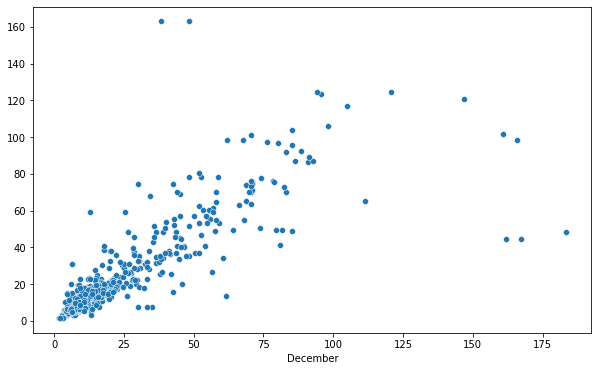

In [12]:
sns.scatterplot(y_test,dt_y_pred)

### Linear Regression Model:

In [13]:
df3=df2.copy()
X=df3.drop(['December','Avg 2020','Avg 2019','Classify Groups'],axis=1)
y=df3['December']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    
    

In [14]:
model=linear_model.LinearRegression().fit(X_train,y_train)

In [15]:
y_pred=model.predict(X_test)

In [16]:
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("r2_score:",score)
print("mae:",mae)
print("mse:",mse)

r2_score: 0.8453968331974469
mae: 4.636349851208921
mse: 85.09722202306264


In [17]:
resDF=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
resDF

,Actual,Predicted
415,48.3,35.120610
2927,5.8,5.281950
3194,10.6,11.438081
298,30.8,46.641145
1874,10.7,12.230347
...,...,...
343,45.2,43.650253
1583,15.0,13.032222
3043,6.2,6.355091
678,25.5,25.941363


In [18]:
model.coef_    

array([-1.78874462e-05, -1.30580181e-02,  2.07381705e-01,  2.11336326e-01,
        4.33624150e-02, -1.46236321e-01,  3.09407481e-01, -3.62858373e-01,
        7.02576801e-03, -3.92613140e-03, -2.20897754e-02,  2.44056205e-01,
        5.84315622e-01])

/Users/carmelisaac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='December'>

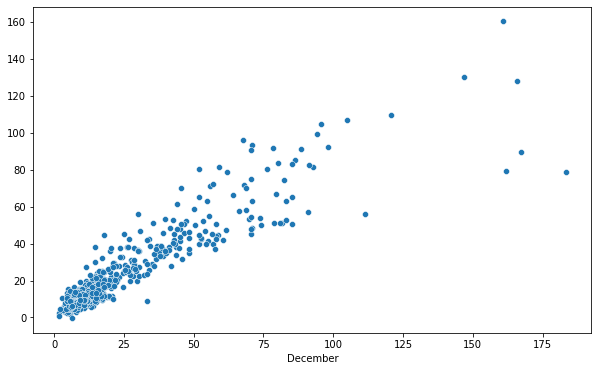

In [19]:
sns.scatterplot(y_test,y_pred)